# Práctica: Perceptrón y Ensembles

* **Alumno 1**: Carlos Jiménez Martín - 160190
* **Alumno 2**: Enrique Gonzalez Rodríguez - 160329


In [0]:
from sklearn.base import BaseEstimator
from abc import abstractmethod
from sklearn.model_selection import cross_val_score
from scipy import stats
import numpy as np

class Classifier(BaseEstimator):

    @abstractmethod
    def fit(self, X, y):
        pass
      
    @abstractmethod
    def predict(self, X):
        pass


class Ensembles(Classifier):
    def __init__(self, improvement, cv):
        """ Class contructor """
        self.clf_list = None
        self.improvement = improvement
        self.cv = cv
        pass


    def fit(self, X, y):
        """Fits the classifier
        X: numpy matrix, each row is an element, each column is a feature
        return Classifier object"""
        clf = Perceptron(n_jobs=-1, random_state=0)
        self.clf_list = [clf.fit(X, y)]
        scores_list = [cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=self.cv).mean()]
        X_train = X
        y_train = y
        k=1

        while scores_list[-1]<scores_list[0]+self.improvement:
          pred_labels = self.clf_list[-1].predict(X_train)
          error_values_index = y_train != pred_labels
          X_train = X_train[error_values_index]
          y_train = y_train[error_values_index]
          #print(X_train)
          #print(y_train)

          if len(np.unique(y_train))==1 or len(y_train)==0:
            break

          k+=1
          self.clf_list.append(Perceptron(eta0=1/k, n_jobs=-1, random_state=0).fit(X_train, y_train))

          aux_scores = []
          for fit_clf in self.clf_list:
            aux_scores.append(cross_val_score(fit_clf, X, y, scoring="accuracy", n_jobs=-1, cv=self.cv).mean())
          scores_list.append(sum(aux_scores)/len(aux_scores))

        return scores_list

    def predict(self, X):
        pred_labels = np.array([])
        for clf in clf_list:
          pred_labels = np.append(pred_labels, [clf.predict(X)])

        return stats.mode(pred_labels)[0][0]

In [0]:
import matplotlib.pyplot as plt

def evaluate(y):
    x = []
    for i in range(len(y)):
      y[i] = y[i]*100
      x.append("C"+str(i))
    # Plot the results
    plt.title("Ensembles") 
    plt.xlabel("Classifiers") 
    plt.ylabel("Accuracy")
    plt.axis([0,len(y)-1,0,100])
    plt.plot(x, y, 'bo',markersize=12) 
    plt.show()

## Iris Dataset
Carga, entrenamiento, predicción y evaluación en la base de datos de Iris:

In [0]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_iris()
X = dataset.data
y = pd.factorize(dataset.target)[0]

# 2. Baraja los datos
X, y = shuffle(X, y)

In [9]:
from sklearn.linear_model import Perceptron

# 3. Entrenar y evaluar el algoritmo para el Perceptron
k = 10
fractions = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

for j in fractions:
  clf = Perceptron(eta0=1/k, n_jobs=-1, early_stopping=True, validation_fraction=j)
  scores = cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=k)
  print('Precisión con validation_fraction:',j,': %0.2f (+/- %0.2f)' % (scores.mean(),scores.std() * 2))

Precisión con validation_fraction: 0.025 : 0.70 (+/- 0.31)
Precisión con validation_fraction: 0.05 : 0.81 (+/- 0.24)
Precisión con validation_fraction: 0.075 : 0.67 (+/- 0.31)
Precisión con validation_fraction: 0.1 : 0.62 (+/- 0.38)
Precisión con validation_fraction: 0.2 : 0.69 (+/- 0.36)
Precisión con validation_fraction: 0.3 : 0.71 (+/- 0.31)
Precisión con validation_fraction: 0.4 : 0.68 (+/- 0.41)
Precisión con validation_fraction: 0.5 : 0.82 (+/- 0.29)
Precisión con validation_fraction: 0.6 : 0.47 (+/- 0.29)
Precisión con validation_fraction: 0.7 : 0.67 (+/- 0.28)
Precisión con validation_fraction: 0.8 : 0.71 (+/- 0.30)
Precisión con validation_fraction: 0.9 : 0.53 (+/- 0.44)
Precisión con validation_fraction: 0.95 : 0.40 (+/- 0.27)


[0.8466666666666667]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  if sys.path[0] == '':


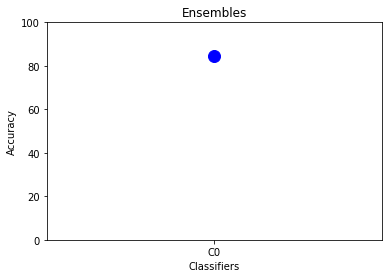

In [10]:
# 4. Entrenar y evaluar el algoritmo para el Ensembles
clf = Ensembles(5, 10)
scores = clf.fit(X, y)
print(scores)
evaluate(scores)

## Wine dataset
Carga, entrenamiento, predicción y evaluación en la base de datos de Wine:

In [0]:
from sklearn.datasets import load_wine

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_wine()
X = dataset.data
y = pd.factorize(dataset.target)[0]

# 2. Baraja los datos
X, y = shuffle(X, y)

In [12]:
# 3. Entrenar y evaluar el algoritmo
k = 10
fractions = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

for j in fractions:
  clf = Perceptron(eta0=1/k, n_jobs=-1, early_stopping=True, validation_fraction=j)
  scores = cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=k)
  print('Precisión con validation_fraction:',j,': %0.2f (+/- %0.2f)' % (scores.mean(),scores.std() * 2))

Precisión con validation_fraction: 0.025 : 0.55 (+/- 0.14)
Precisión con validation_fraction: 0.05 : 0.52 (+/- 0.20)
Precisión con validation_fraction: 0.075 : 0.53 (+/- 0.22)
Precisión con validation_fraction: 0.1 : 0.52 (+/- 0.28)
Precisión con validation_fraction: 0.2 : 0.47 (+/- 0.23)
Precisión con validation_fraction: 0.3 : 0.50 (+/- 0.27)
Precisión con validation_fraction: 0.4 : 0.51 (+/- 0.23)
Precisión con validation_fraction: 0.5 : 0.46 (+/- 0.29)
Precisión con validation_fraction: 0.6 : 0.40 (+/- 0.24)
Precisión con validation_fraction: 0.7 : 0.43 (+/- 0.23)
Precisión con validation_fraction: 0.8 : 0.47 (+/- 0.24)
Precisión con validation_fraction: 0.9 : 0.40 (+/- 0.22)
Precisión con validation_fraction: 0.95 : 0.34 (+/- 0.08)


[0.6250171998624011, 0.6250171998624011, 0.6250171998624011]


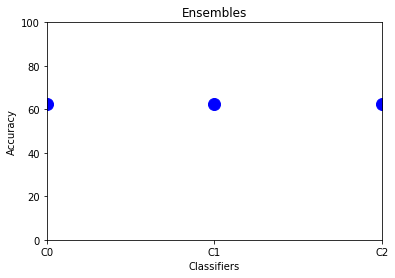

In [13]:
# 4. Entrenar y evaluar el algoritmo para el Ensembles
clf = Ensembles(5, k)
scores = clf.fit(X, y)
print(scores)
evaluate(scores)

## Breast cancer dataset
Carga, entrenamiento, predicción y evaluación en la base de datos de Breast cancer:

In [0]:
from sklearn.datasets import load_breast_cancer

# 1. Cargar los datos de la base de datos de entrenamiento
dataset = load_breast_cancer()
X = dataset.data
y = pd.factorize(dataset.target)[0]

# 2. Baraja los datos
X, y = shuffle(X, y)

In [15]:
# 3. Entrenar y evaluar el algoritmo
k = 10
fractions = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

for j in fractions:
  clf = Perceptron(eta0=1/k, n_jobs=-1, early_stopping=True, validation_fraction=j)
  scores = cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=k)
  print('Precisión con validation_fraction:',j,': %0.2f (+/- %0.2f)' % (scores.mean(),scores.std() * 2))

Precisión con validation_fraction: 0.025 : 0.83 (+/- 0.27)
Precisión con validation_fraction: 0.05 : 0.89 (+/- 0.08)
Precisión con validation_fraction: 0.075 : 0.83 (+/- 0.26)
Precisión con validation_fraction: 0.1 : 0.84 (+/- 0.26)
Precisión con validation_fraction: 0.2 : 0.83 (+/- 0.22)
Precisión con validation_fraction: 0.3 : 0.72 (+/- 0.38)
Precisión con validation_fraction: 0.4 : 0.75 (+/- 0.42)
Precisión con validation_fraction: 0.5 : 0.77 (+/- 0.35)
Precisión con validation_fraction: 0.6 : 0.77 (+/- 0.39)
Precisión con validation_fraction: 0.7 : 0.81 (+/- 0.21)
Precisión con validation_fraction: 0.8 : 0.69 (+/- 0.43)
Precisión con validation_fraction: 0.9 : 0.62 (+/- 0.42)
Precisión con validation_fraction: 0.95 : 0.68 (+/- 0.39)


[0.7917520093336791, 0.7917520093336791, 0.7917520093336791]


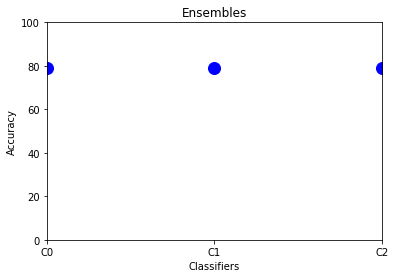

In [16]:
# 4. Entrenar y evaluar el algoritmo para el Ensembles
clf = Ensembles(5, k)
scores = clf.fit(X, y)
print(scores)
evaluate(scores)

## Isolet Dataset (Isolated Letter Speech Recognition)
Carga, entrenamiento, predicción y evaluación en la base de datos de Isolet

In [0]:
from sklearn.datasets import fetch_openml

# 1. Cargar los datos de la base de datos de entrenamiento
X, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
y = pd.factorize(y)[0]

# 2. Baraja los datos
X, y = shuffle(X, y)

In [0]:
# 3. Entrenar y evaluar el algoritmo
k = 10
fractions = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

for j in fractions:
  clf = Perceptron(eta0=1/k, n_jobs=-1, early_stopping=True, validation_fraction=j)
  scores = cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=k)
  print('Precisión con validation_fraction:',j,': %0.2f (+/- %0.2f)' % (scores.mean(),scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Precisión con validation_fraction: 0.025 : 0.93 (+/- 0.02)
Precisión con validation_fraction: 0.05 : 0.93 (+/- 0.03)


In [0]:
# 4. Entrenar y evaluar el algoritmo para el Ensembles
clf = Ensembles(5, k)
scores = clf.fit(X, y)
print(scores)
evaluate(scores)

## MNIST Database (Modified National Institute of Standards and Technology database)
MNIST es una base de datos de texto manuscrito, que se usa de forma clásica para entrenar sistemas de procesado de imágenes.

Carga, entrenamiento, predicción y evaluación en la base de datos de MNIST:


In [0]:
from sklearn.datasets import fetch_openml

# 1. Cargar los datos de la base de datos de entrenamiento
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)

# 2. Baraja los datos
X, y = shuffle(X, y)
all_X, all_y = shuffle(all_X, all_y)
X = all_X[:20000]
y = all_y[:20000]
y = pd.factorize(y)[0]

In [0]:
# 3. Entrenar y evaluar el algoritmo
k = 10
fractions = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

for j in fractions:
  clf = Perceptron(eta0=1/k, n_jobs=-1, early_stopping=True, validation_fraction=j)
  scores = cross_val_score(clf, X, y, scoring="accuracy", n_jobs=-1, cv=k)
  print('Precisión con validation_fraction:',j,': %0.2f (+/- %0.2f)' % (scores.mean(),scores.std() * 2))

In [0]:
# 4. Entrenar y evaluar el algoritmo para el Ensembles
clf = Ensembles(5, k)
print(clf.fit(X, y))